# Clustering Analysis


A. Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method.
Dataset Link: https://www.kaggle.com/datasets/uciml/iris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
iris_data = pd.read_csv('./datasets/Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The Species column contains labels that we won't use for clustering, as K-Means is an unsupervised algorithm.

In [3]:
# Drop 'Id' and 'Species' columns for clustering
iris_data = iris_data.drop(columns=['Id', 'Species'])

iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [4]:
# Standardize the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data)

# Checking the first few rows of the scaled data
pd.DataFrame(iris_scaled, columns=iris_data.columns).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


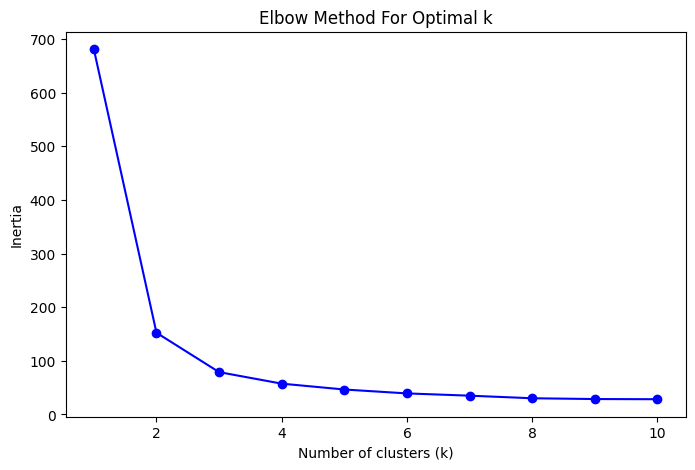

In [5]:
# Apply KMeans clustering for a range of cluster numbers
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

**Observation:**

We expect to see a graph where the inertia decreases sharply as we increase the number of clusters but starts leveling off at some point. This "elbow point" is the optimal number of clusters.

### K-Means Clustering with k=3

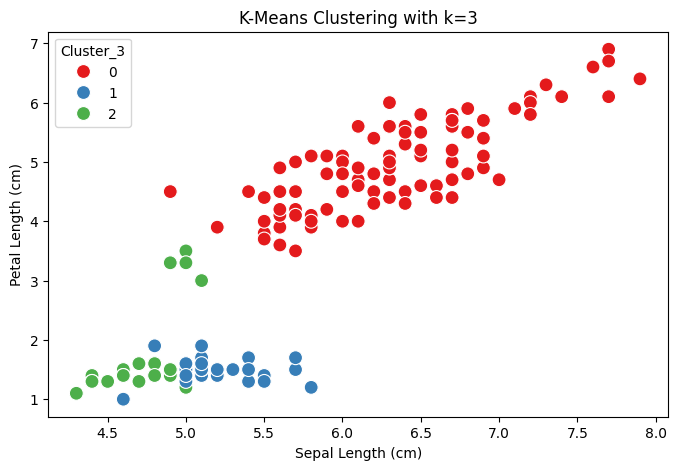

In [6]:
# Apply K-Means with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
iris_data['Cluster_3'] = kmeans_3.fit_predict(iris_scaled)

# Visualizing the clusters using Sepal and Petal length/width
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=iris_data['SepalLengthCm'],
    y=iris_data['PetalLengthCm'],
    hue=iris_data['Cluster_3'],
    palette='Set1',
    s=100
)

plt.title('K-Means Clustering with k=3')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

## B. Implement K-Mediod Algorithm on a credit card dataset. Determine the number of clusters using the Silhouette Method.
Dataset link: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [7]:
!pip install scikit-learn-extra

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the Credit Card dataset
cc_data = pd.read_csv('./datasets/Credit_Card.csv')
cc_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Observation:**

At this point, we should observe the features of the credit card dataset. Typically, it contains variables like Balance, Purchase Frequency, Credit Limit, etc., related to customer spending and financial behavior.

### Step 3: Data Preprocessing

In [10]:
# Drop 'CUST_ID' or other non-essential columns if present
cc_data = cc_data.drop(columns=['CUST_ID'], errors='ignore')
cc_data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Fill missing values or remove columns with too many missing entries
cc_data = cc_data.fillna(cc_data.mean())  # Filling missing values with the mean

In [12]:
# Standardize the data
scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc_data)

# Display the first few rows of scaled data
pd.DataFrame(cc_scaled, columns=cc_data.columns).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


### Step 4: K-Medoid Clustering with Silhouette Method for Optimal Number of Clusters

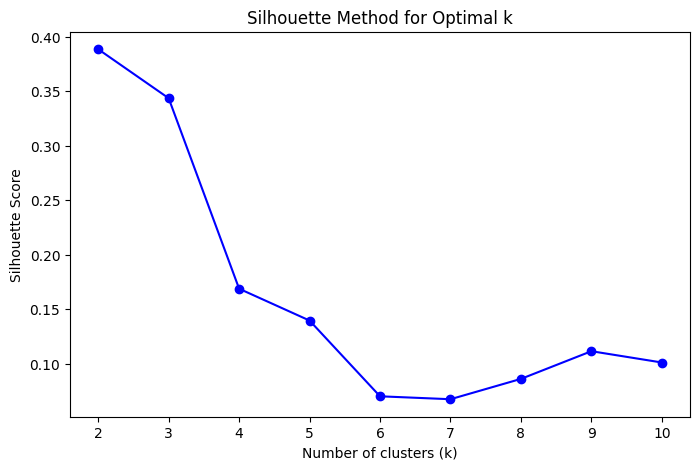

In [13]:
# Finding the optimal number of clusters using the Silhouette score
silhouette_scores = []
K = range(2, 11)  # Start from 2 clusters since silhouette is undefined for 1 cluster

for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    cluster_labels = kmedoids.fit_predict(cc_data)

    # Calculate the silhouette score
    score = silhouette_score(cc_data, cluster_labels)
    silhouette_scores.append(score)

# Plotting the Silhouette scores for different number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


**Observation:**

k = 2 provides the highest silhouette score so we select k = 2

### Step 5: Finalizing the K-Medoids Clustering with k=2

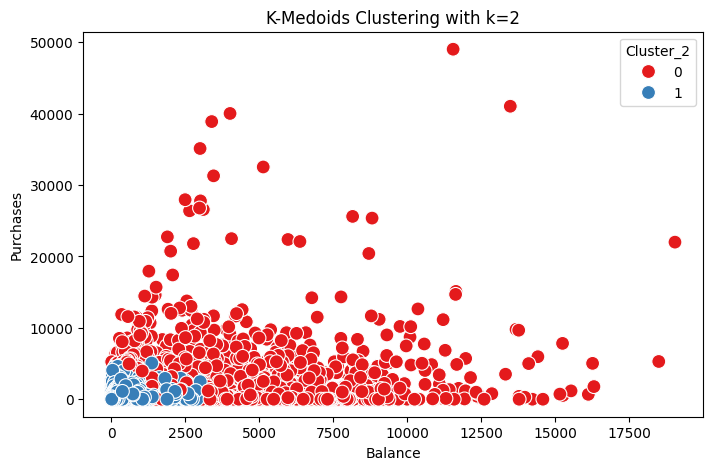

In [14]:
# Apply K-Medoids clustering with k=2
kmedoids_2 = KMedoids(n_clusters=2, random_state=42)
cc_data['Cluster_2'] = kmedoids_2.fit_predict(cc_data)

# Visualizing the clusters (if you want to visualize two features, you can change x and y)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=cc_data['BALANCE'],
                y=cc_data['PURCHASES'],
                hue=cc_data['Cluster_2'],
                palette='Set1',
                s=100)

plt.title('K-Medoids Clustering with k=2')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()
